<a href="https://colab.research.google.com/github/aksharpande/5278---Final-Project/blob/main/stock_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CS5262-ML:Stock market analysis 

##Background:
There is a lot of data avaiable for stocks traded in the exchanges(NYSE, NASDAQ, BSE) but there is very less perdictive data analysis done on them. Most of the analysis is on the external factors driving the value. Here is my attempt to use all the data and try to analyze it for prediction.

##Project Description
I'm going to use yahoo finance data which is avaiable and can be easily converted to dataframes. I'm also planning to use seaborn and pandas to visualize the data.

##Performance metric
1. Pattern analysis: Pattern analysis using visualizations to create a model for learning and prediction.
2. Price drivers: What is driving the price of a stock, there a re many factors that can be considered here like market conditions, new products, diversification etc.
3. Similar stocks: Use data from similar industries to to train and try to do a accurate prediction. For eg: data from Pfizer can be used to train and analyze the stock proce for Johnson&Johnson 

##Basic EDA
Questions to be answered after examining the data.

1. Daily movement(increase/decrease) in the stock price?
2. What was the daily moving average of the selected stocks?
3. Daily return on investment?

# **1. Daily movement(increase/decrease) in the stock price?**

In [23]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("Solarize_Light2")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
#!pip install yfinance
import yfinance as yf
from datetime import datetime

# The stocks used for this analysis
stocks = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Time window for for data on stocks
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

for stock in stocks:
    globals()[stock] = yf.download(stock, start, end)

#Adding some features to the dataframe
stock_list = [AAPL, GOOG, MSFT, AMZN]
stock = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON"]

for company, com_name in zip(stock_list, stock):
    company["Stock"] = com_name
#Adding stock company
df = pd.concat(stock_list, axis=0)
df.head(10) 

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Stock
Date,,,,,,,
2021-09-08,156.979996,157.039993,153.979996,155.110001,154.245667,74420200,APPLE
2021-09-09,155.490005,156.110001,153.949997,154.070007,153.211472,57305700,APPLE
2021-09-10,155.000000,155.479996,148.699997,148.970001,148.139893,140893200,APPLE
2021-09-13,150.630005,151.419998,148.750000,149.550003,148.716660,102404300,APPLE
2021-09-14,150.350006,151.070007,146.910004,148.119995,147.294617,109296300,APPLE
2021-09-15,148.559998,149.440002,146.369995,149.029999,148.199539,83281300,APPLE
2021-09-16,148.440002,148.970001,147.220001,148.789993,147.960876,68034100,APPLE
2021-09-17,148.820007,148.820007,145.759995,146.059998,145.246094,129868800,APPLE
2021-09-20,143.800003,144.839996,141.270004,142.940002,142.143478,123478900,APPLE


In [12]:
#Dive deep into Amazon
AMZN.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 253 entries, 2021-09-08 to 2022-09-08
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       253 non-null    float64
 1   High       253 non-null    float64
 2   Low        253 non-null    float64
 3   Close      253 non-null    float64
 4   Adj Close  253 non-null    float64
 5   Volume     253 non-null    int64  
 6   Stock      253 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


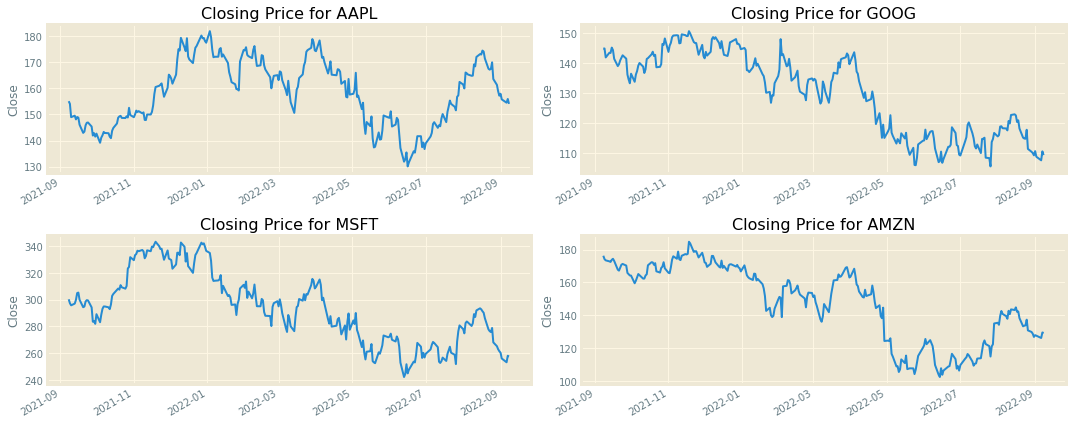

In [24]:
#Plotting the data frames using Close values

plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(stock_list, 1):
    plt.subplot(2, 2, i)
    company['Close'].plot()
    plt.ylabel('Close')
    plt.xlabel(None)
    plt.title(f"Closing Price for {stocks[i - 1]}")
    
plt.tight_layout()

# **2. What was the daily moving average of the selected stocks?**
We will calculate and add the moving averages for the stock closing price to the dataframe using the rolling().mean() method from pandas


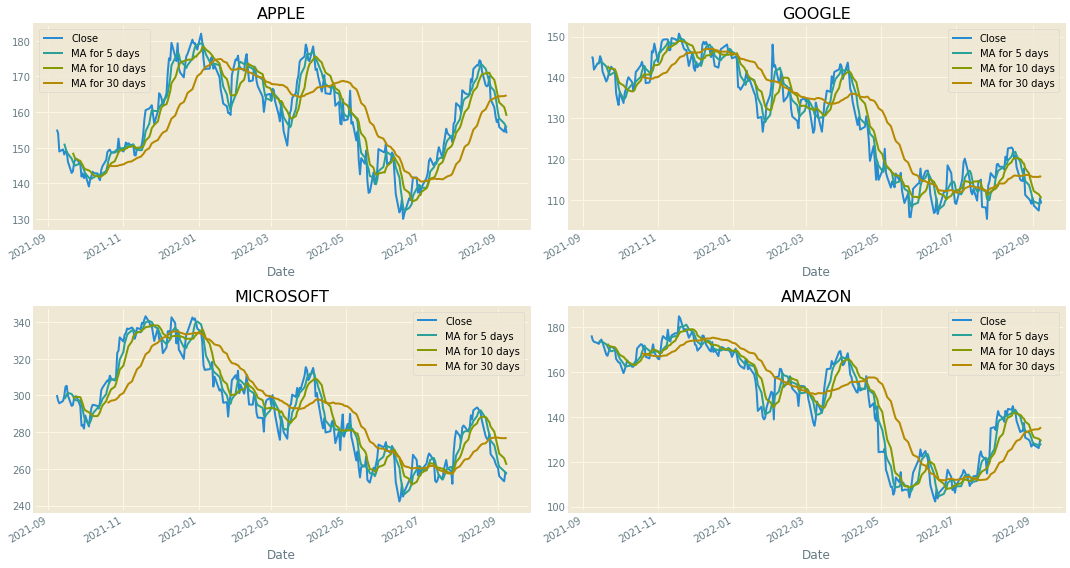

In [25]:
#Calulate the moving average
ma_day = [5, 10, 30]

for ma in ma_day:
    for stock in stock_list:
        column_name = f"MA for {ma} days"
        stock[column_name] = stock['Close'].rolling(ma).mean()

#Plotting for moving averages
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

AAPL[['Close', 'MA for 5 days', 'MA for 10 days', 'MA for 30 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

GOOG[['Close', 'MA for 5 days', 'MA for 10 days', 'MA for 30 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

MSFT[['Close', 'MA for 5 days', 'MA for 10 days', 'MA for 30 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

AMZN[['Close', 'MA for 5 days', 'MA for 10 days', 'MA for 30 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

fig.tight_layout()

# **3. Daily return on investment?**

For this we will leverage the pct_change method from the pandas library to get compare the values of last "Close" with current and plot that to see the return.
We will also add Daily_return as a feature to the dataframe

In [27]:
# We'll use pct_change to find the percent change for each day and add a column 
#to our df
for stock in stock_list:
    stock['Daily Return'] = stock['Close'].pct_change()

AMZN.describe()

,Open,High,Low,Close,Adj Close,Volume,MA for 5 days,MA for 10 days,MA for 30 days,Daily Return
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02,249.000000,244.000000,224.000000,252.000000
mean,147.729615,149.895386,145.396700,147.571554,147.571554,7.180712e+07,147.506560,147.442912,147.037538,-0.000845
std,23.234144,22.970961,23.371513,23.108853,23.108853,3.159204e+07,22.843728,22.554328,21.752767,0.027875
min,102.750000,104.580002,101.260002,102.309998,102.309998,2.896738e+07,104.706000,107.940000,111.753250,-0.140494
25%,127.720001,129.820007,124.739998,126.769997,126.769997,5.222900e+07,128.017999,129.210999,126.495271,-0.015455
50%,152.732498,155.499496,150.534500,152.785004,152.785004,6.360400e+07,152.380801,152.451199,152.966233,-0.001396
75%,167.710495,169.449997,165.500000,168.346497,168.346497,8.224550e+07,168.594897,167.640515,167.315459,0.013365
max,185.634506,188.107498,183.785995,184.802994,184.802994,2.726620e+08,181.056497,179.035799,175.251601,0.135359


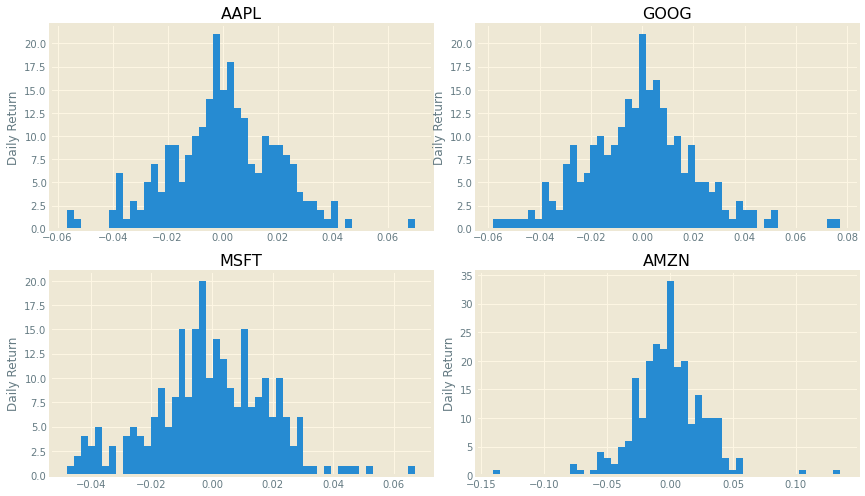

In [32]:
#Plotting the daily return for our listed stocks
plt.figure(figsize=(12, 7))

for i, company in enumerate(stock_list, 1):
    plt.subplot(2, 2, i)
    company['Daily Return'].hist(bins=50)
    plt.ylabel('Daily Return')
    plt.title(f'{stocks[i - 1]}')
    
plt.tight_layout()